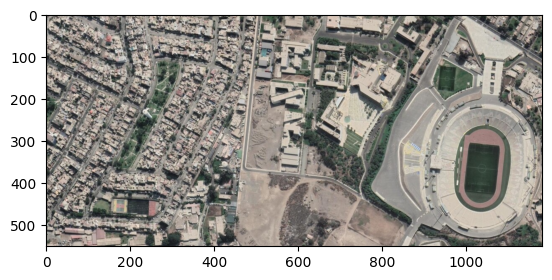

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


path = f"images/unmsm.jpg"

img = cv2.imread(path)


rgb_values = [(103, 122, 103), (34, 44, 45), (87, 105, 89), (107, 122, 101), (99, 124, 102),
              (39, 55, 44), (50, 63, 54), (81, 87, 77), (49, 70, 55)]


rgb_array = np.array(rgb_values)

min_values = np.min(rgb_array, axis=0)
max_values = np.max(rgb_array, axis=0)

mask = cv2.inRange(img, min_values, max_values)
mask = cv2.medianBlur(mask, 5)


img_copy = img.copy()
result = cv2.bitwise_and(img_copy, img_copy, mask=mask)


mask_3d = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask_3d[np.where((mask_3d == [255, 255, 255]).all(axis=2))] = [0, 255, 0]


alpha = 0.5
beta = 1 - alpha
overlapped = cv2.addWeighted(img, alpha, mask_3d, beta, 0)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.show()



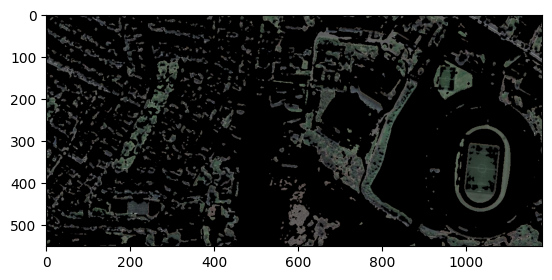

In [25]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()


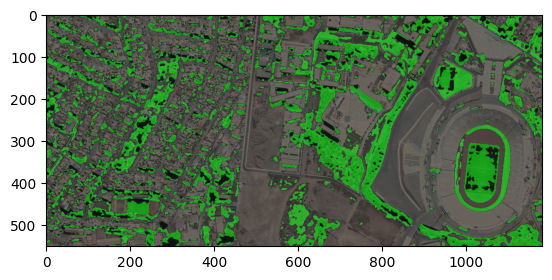

In [26]:
plt.imshow(cv2.cvtColor(overlapped, cv2.COLOR_BGR2RGB))
plt.show()


cv2.imwrite(f"images/segmentedOverlapped.jpg", overlapped)
cv2.destroyAllWindows()